In [1]:
!python --version

Python 3.7.4


In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
%matplotlib inline
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve,auc
import warnings
warnings.filterwarnings('ignore')
from sklearn import model_selection
from sklearn import metrics
import pickle
from matplotlib import pyplot


import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# from kerastuner.tuners import RandomSearch

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [4]:
df.dropna(inplace=True)

In [5]:
def fun(df):
    print(df.shape)
    print('********'*5)
    print(df.info())
    print('********'*5)
    print(df.describe())
    print('********'*5)
    print(df.isnull().sum())
fun(df)

(4909, 12)
****************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
id                   4909 non-null int64
gender               4909 non-null object
age                  4909 non-null float64
hypertension         4909 non-null int64
heart_disease        4909 non-null int64
ever_married         4909 non-null object
work_type            4909 non-null object
Residence_type       4909 non-null object
avg_glucose_level    4909 non-null float64
bmi                  4909 non-null float64
smoking_status       4909 non-null object
stroke               4909 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB
None
****************************************
                 id          age  hypertension  heart_disease  \
count   4909.000000  4909.000000   4909.000000    4909.000000   
mean   37064.313506    42.865374      0.091872       0.049501   
std    20995.098457    22.555115 

# Categorical Data Analysis.

In [6]:
gender_count=df['gender'].value_counts()
gender_count

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

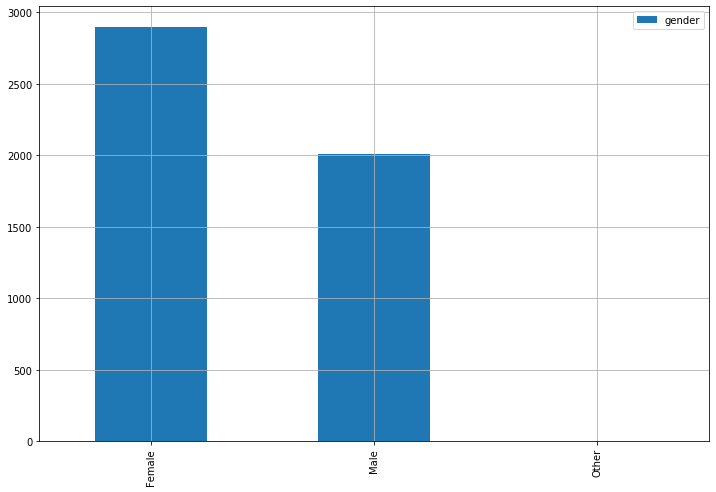

In [7]:
plt.figure(figsize=(12,8))
gender_count.plot(kind='bar',grid=True,legend=True)
plt.show()

In [8]:
x=pd.crosstab(df['gender'],df['ever_married'])
x

ever_married   No   Yes
gender                 
Female        964  1933
Male          740  1271
Other           1     0

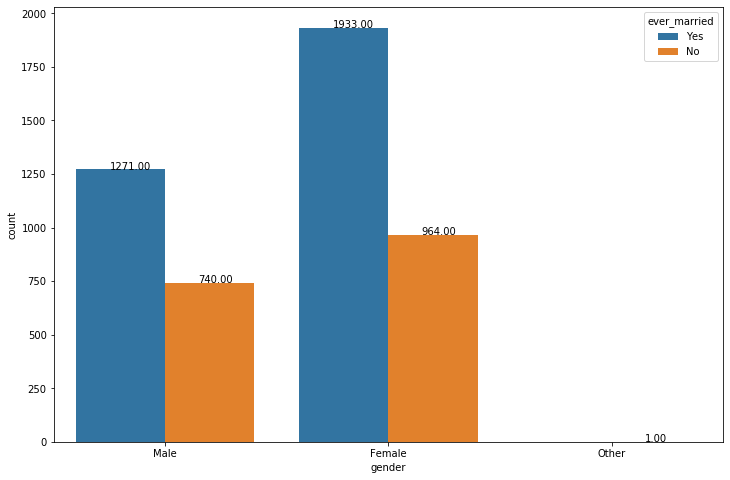

In [9]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x= df['gender'],hue=df['ever_married'],data=df)
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [10]:
x1=pd.crosstab(df['gender'],df['heart_disease'])
x1

heart_disease     0    1
gender                  
Female         2797  100
Male           1868  143
Other             1    0

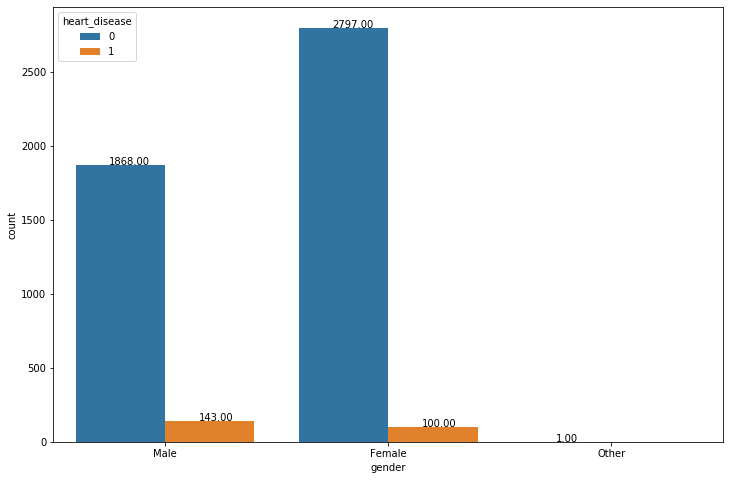

In [11]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x= df['gender'],hue=df['heart_disease'],data=df)
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [12]:
x2=pd.crosstab(df['gender'],df['hypertension'])
x2

hypertension     0    1
gender                 
Female        2646  251
Male          1811  200
Other            1    0

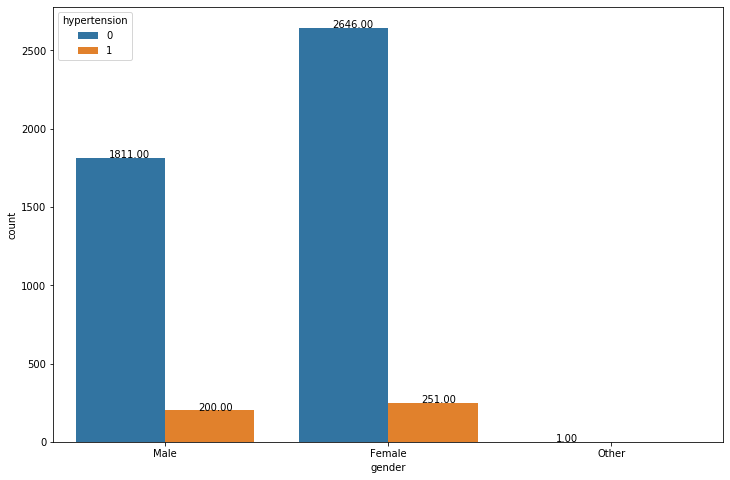

In [13]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x= df['gender'],hue=df['hypertension'],data=df)
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [14]:
x3=pd.crosstab(df['gender'],df['smoking_status'])
x3

smoking_status  Unknown  formerly smoked  never smoked  smokes
gender                                                        
Female              811              458          1203     425
Male                672              378           649     312
Other                 0                1             0       0

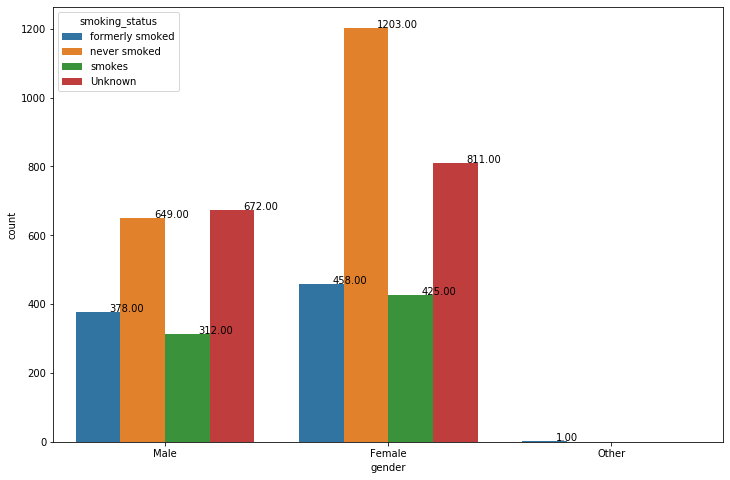

In [15]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x= df['gender'],hue=df['smoking_status'],data=df)
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [16]:
x3=pd.crosstab(df['gender'],df['stroke'])
x3

stroke     0    1
gender           
Female  2777  120
Male    1922   89
Other      1    0

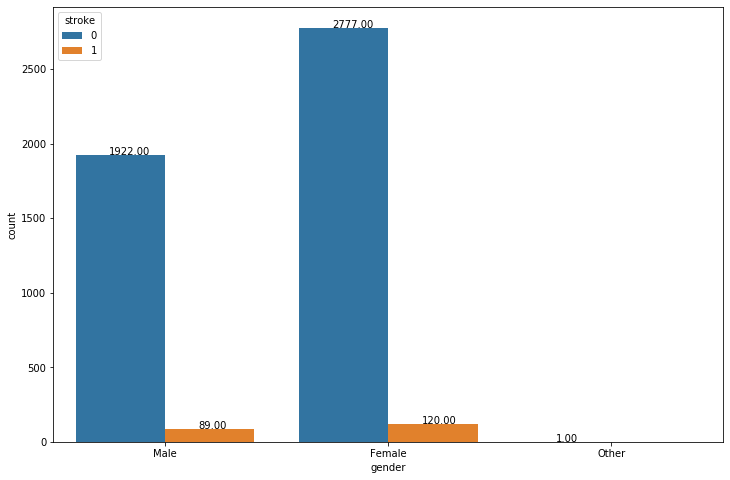

In [17]:
  plt.figure(figsize=(12,8))
ax = sns.countplot(x= df['gender'],hue=df['stroke'],data=df)
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [18]:
x4=pd.crosstab(df['hypertension'],df['stroke'])
x4

stroke           0    1
hypertension           
0             4309  149
1              391   60

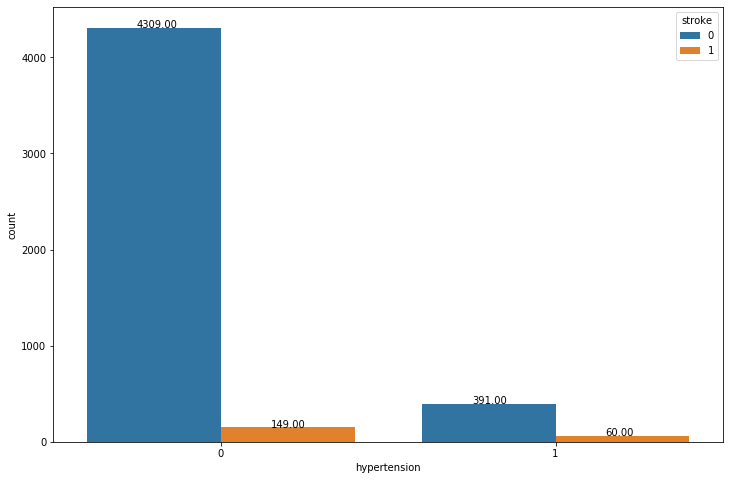

In [19]:
  plt.figure(figsize=(12,8))
ax = sns.countplot(x= df['hypertension'],hue=df['stroke'],data=df)
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [20]:
x5=pd.crosstab(df['heart_disease'],df['stroke'])
x5

stroke            0    1
heart_disease           
0              4497  169
1               203   40

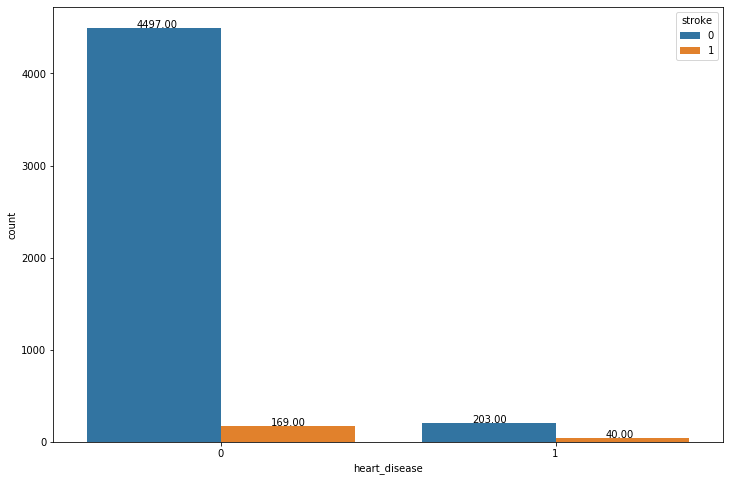

In [21]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x= df['heart_disease'],hue=df['stroke'],data=df)
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [22]:
x6=pd.crosstab(df['ever_married'],df['stroke'])
x6

stroke           0    1
ever_married           
No            1682   23
Yes           3018  186

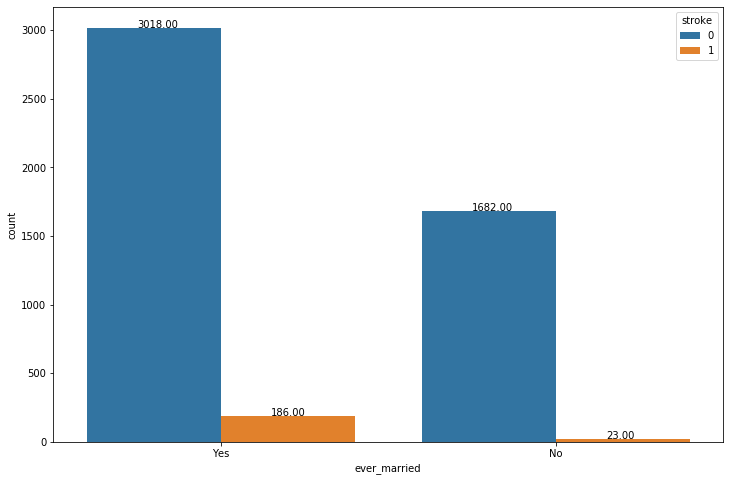

In [23]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x= df['ever_married'],hue=df['stroke'],data=df)
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [24]:
x7=pd.crosstab(df['work_type'],df['stroke'])
x7

stroke            0    1
work_type               
Govt_job        602   28
Never_worked     22    0
Private        2684  127
Self-employed   722   53
children        670    1

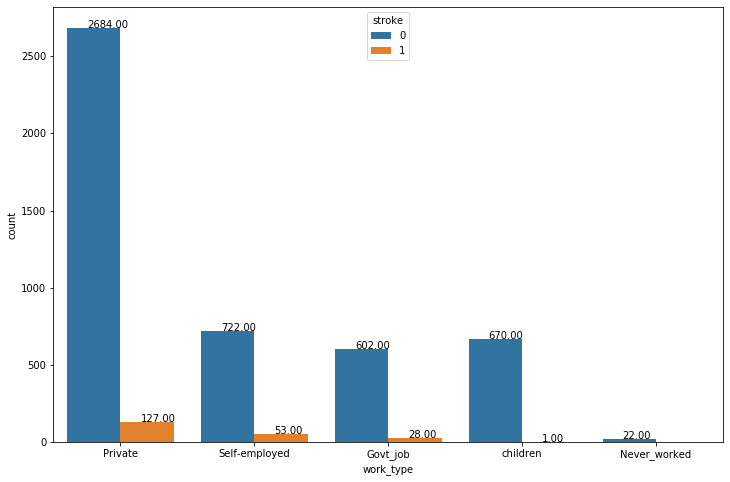

In [25]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x= df['work_type'],hue=df['stroke'],data=df)
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [26]:
x8=pd.crosstab(df['Residence_type'],df['stroke'])
x8

stroke             0    1
Residence_type           
Rural           2319  100
Urban           2381  109

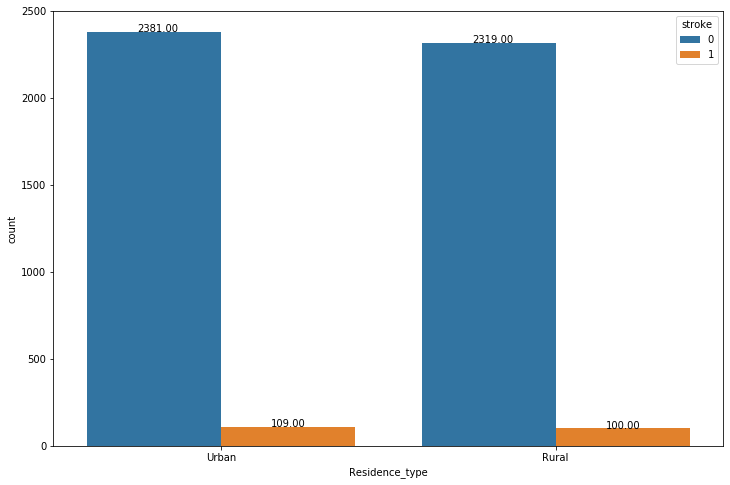

In [27]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x= df['Residence_type'],hue=df['stroke'],data=df)
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [28]:
x9=pd.crosstab(df['smoking_status'],df['stroke'])
x9

stroke              0   1
smoking_status           
Unknown          1454  29
formerly smoked   780  57
never smoked     1768  84
smokes            698  39

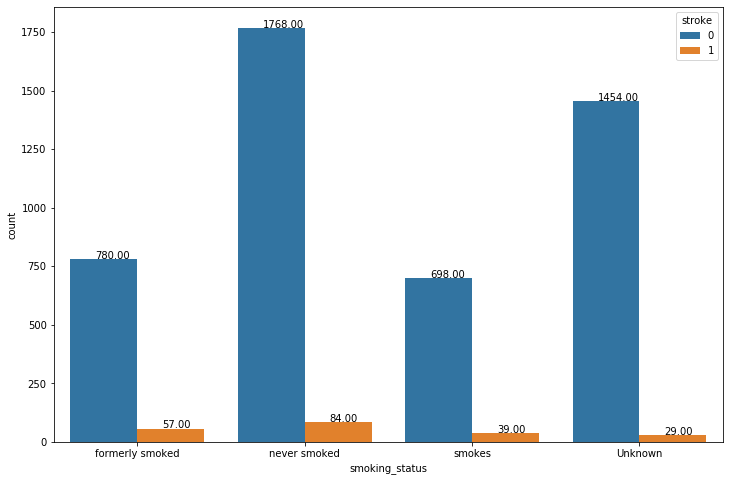

In [29]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x= df['smoking_status'],hue=df['stroke'],data=df)
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

# Numerical Data Analysis.

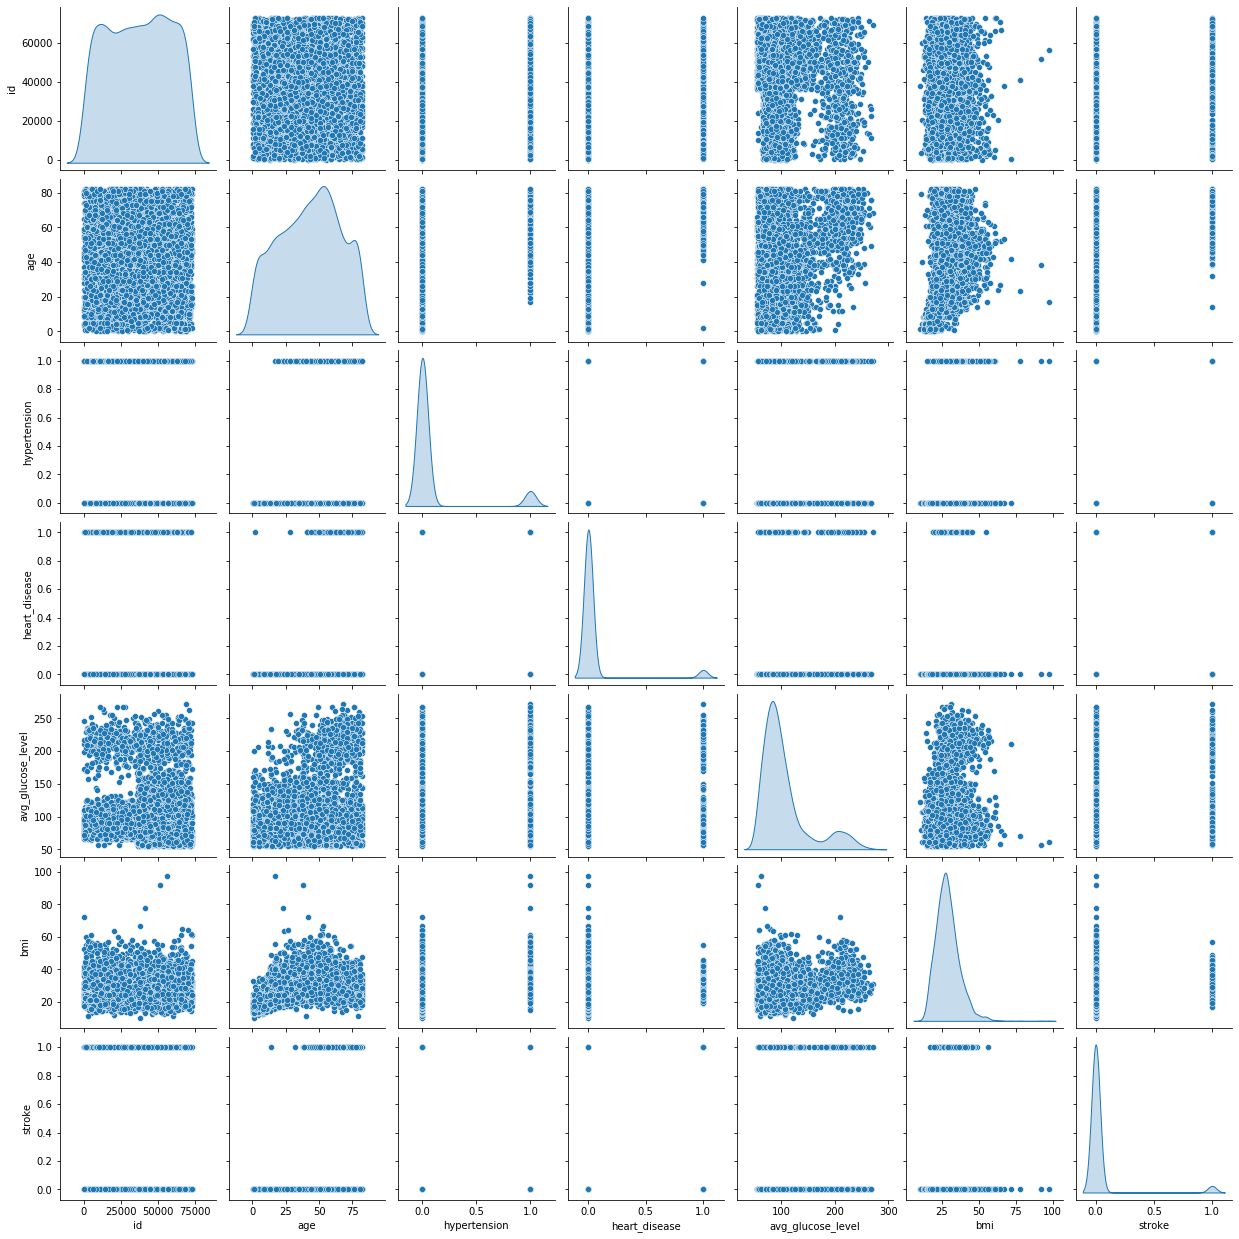

In [30]:
sns.pairplot(df,diag_kind='kde')
plt.show()

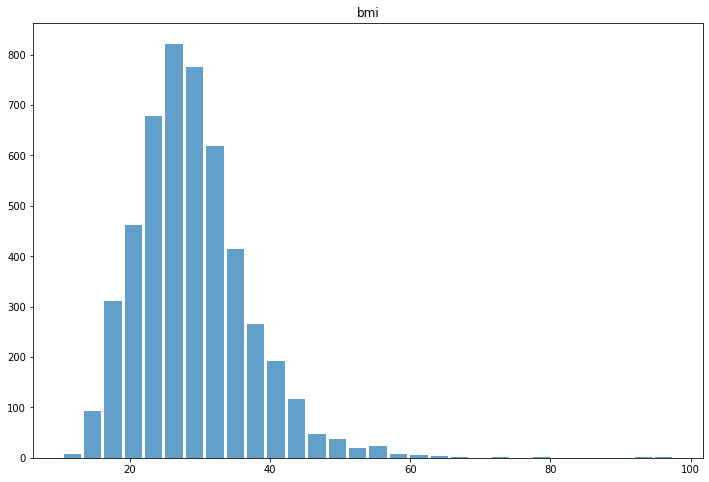

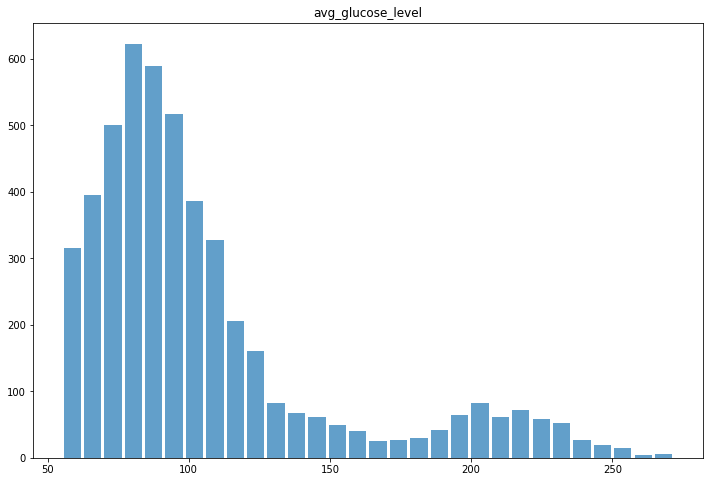

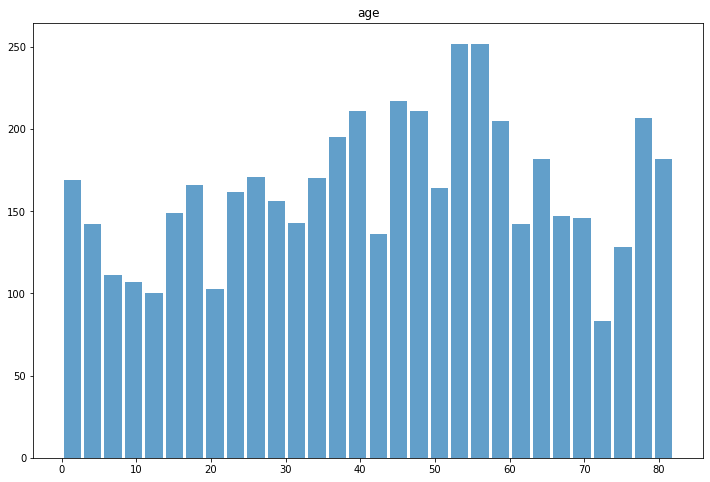

In [31]:
r = ["bmi","avg_glucose_level","age"]
for i in r:
    plt.figure(figsize=(12,8))
    plt.hist(x=i,bins=30,data=df,alpha=0.7, rwidth=0.85)
    plt.title(i)
    plt.show()



In [32]:
x=list(df['age'].values)
hist_data=[x]
group_labels = ['age_distribution']
figure=ff.create_distplot(hist_data,group_labels)
figure.show()

In [33]:
x11=list(df['avg_glucose_level'].values)
hist_data=[x11]
group_labels = ['avg_glucose_level_distribution']
figure=ff.create_distplot(hist_data,group_labels,bin_size=10)
figure.show()

In [34]:
x12=list(df['bmi'].values)
hist_data=[x12]
group_labels = ['bmi_distribution']
figure=ff.create_distplot(hist_data,group_labels,bin_size=2)
figure.show()

In [35]:
px.box(data_frame = df, x = "age", width = 800,height = 300)

In [36]:
px.box(data_frame = df, x = "avg_glucose_level", width = 800,height = 300)

In [37]:
px.box(data_frame = df, x = "bmi", width = 800,height = 300)

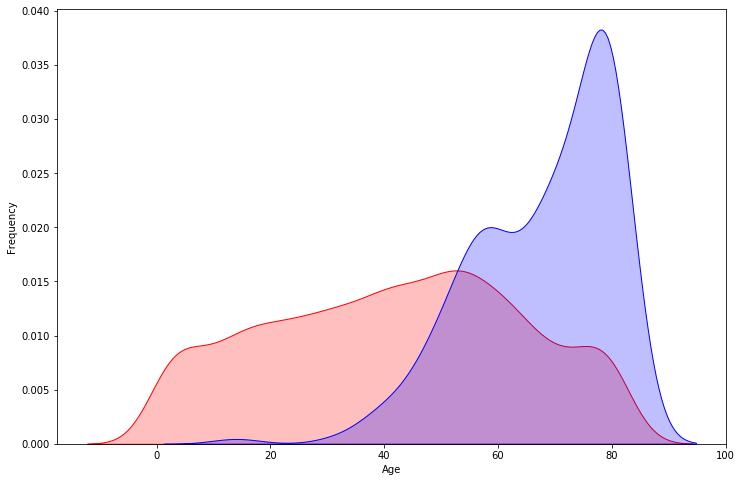

In [38]:
plt.figure(figsize=(12,8))
g1= sns.kdeplot(df['age'][(df["stroke"] == 0)] , color="Red", shade = True)
g2 = sns.kdeplot(df['age'][(df["stroke"] == 1)], ax =g1, color="Blue", shade= True)
g1.set_xlabel('Age')
g1.set_ylabel("Frequency")
plt.show()

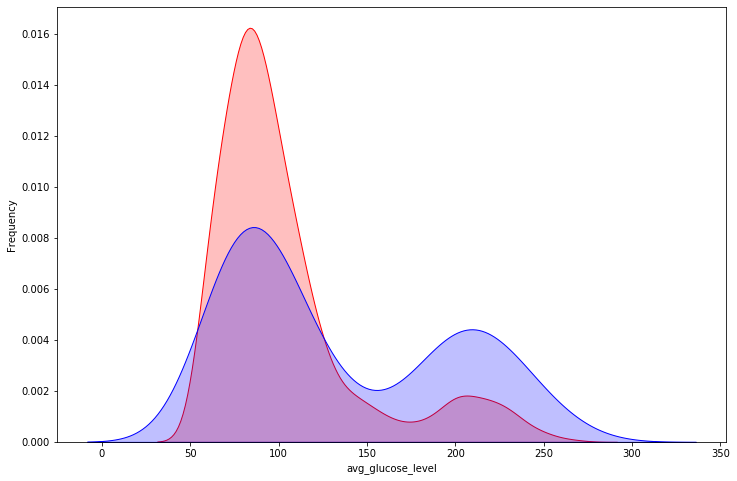

In [39]:
plt.figure(figsize=(12,8))
g1= sns.kdeplot(df['avg_glucose_level'][(df["stroke"] == 0)] , color="Red", shade = True)
g2 = sns.kdeplot(df['avg_glucose_level'][(df["stroke"] == 1)], ax =g1, color="Blue", shade= True)
g1.set_xlabel('avg_glucose_level')
g1.set_ylabel("Frequency")
plt.show()

In [40]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

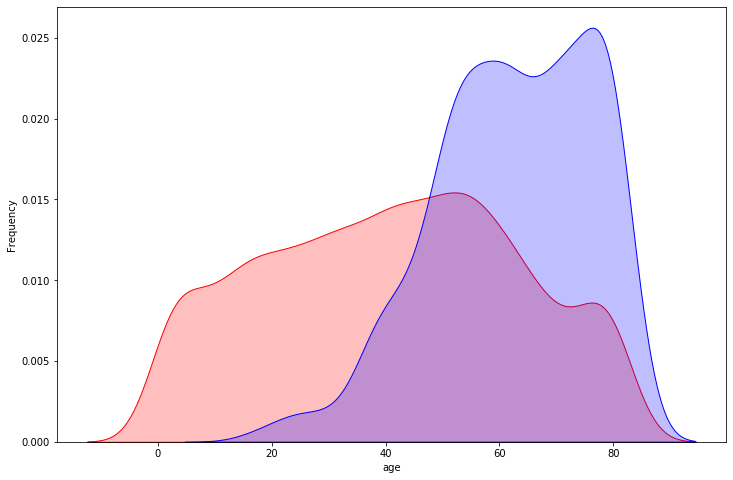

In [41]:
plt.figure(figsize=(12,8))
g1= sns.kdeplot(df['age'][(df["hypertension"] == 0)] , color="Red", shade = True)
g2 = sns.kdeplot(df['age'][(df["hypertension"] == 1)], ax =g1, color="Blue", shade= True)
g1.set_xlabel('age')
g1.set_ylabel("Frequency")
plt.show()

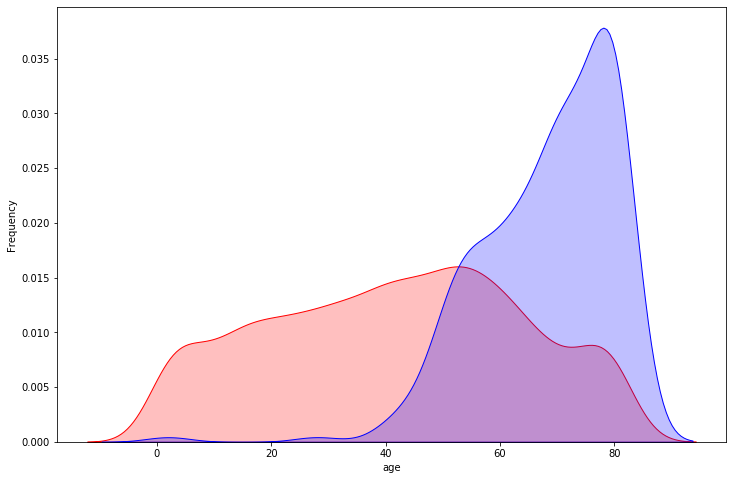

In [42]:
plt.figure(figsize=(12,8))
g1= sns.kdeplot(df['age'][(df["heart_disease"] == 0)] , color="Red", shade = True)
g2 = sns.kdeplot(df['age'][(df["heart_disease"] == 1)], ax =g1, color="Blue", shade= True)
g1.set_xlabel('age')
g1.set_ylabel("Frequency")
plt.show()

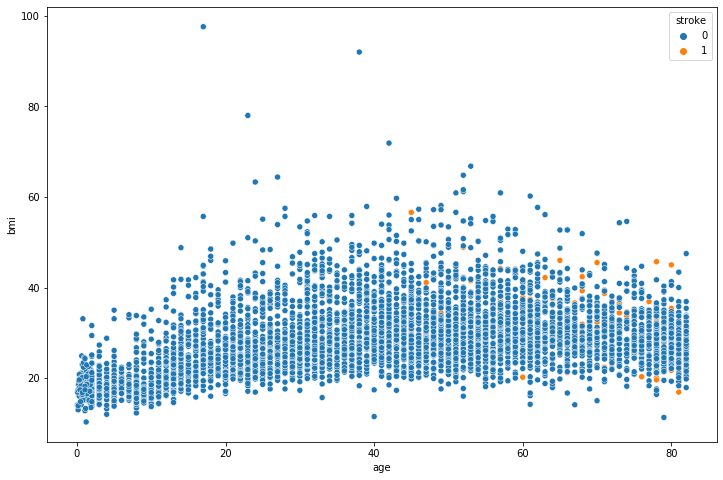

In [43]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df['age'],y=df['bmi'],hue=df['stroke'])
plt.show()

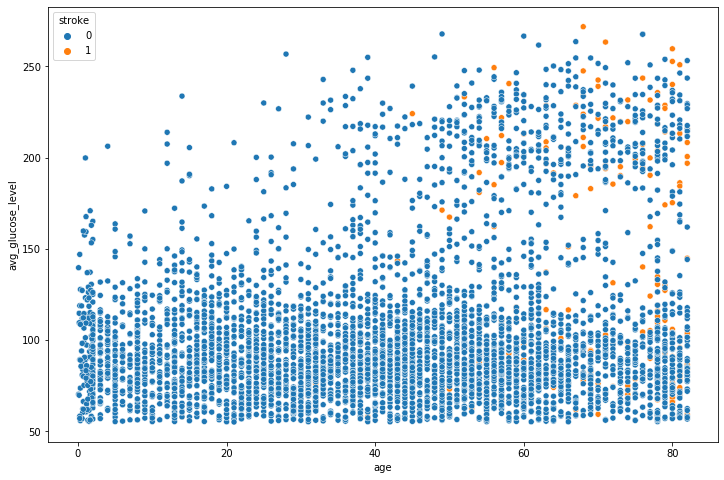

In [44]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df['age'],y=df['avg_glucose_level'],hue=df['stroke'])
plt.show()

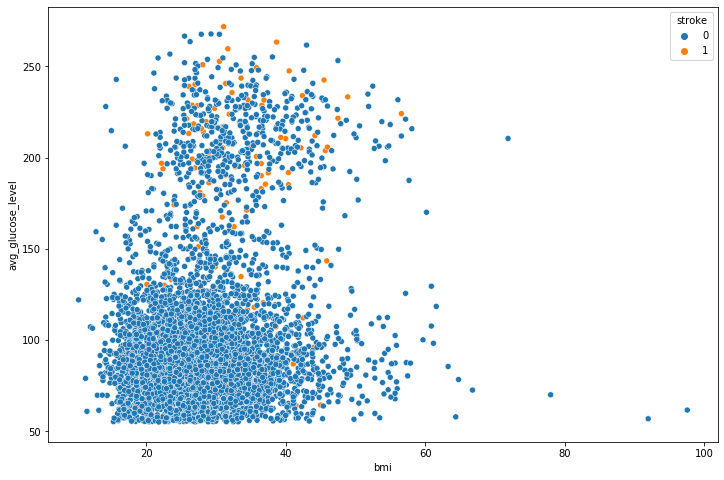

In [45]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df['bmi'],y=df['avg_glucose_level'],hue=df['stroke'])
plt.show()

In [46]:
data_male=df[df['gender']=='Male']
print('Median BMI of male with age less than 30 : ',data_male[data_male['age']<30]['bmi'].median())
print('Median BMI of male with age more than 30 and less than 50 : ',data_male[(data_male['age']>30) & (data_male['age']<50)]['bmi'].median())
print('Median BMI of male with age greater than 50 : ',data_male[data_male['age']>50]['bmi'].median())

Median BMI of male with age less than 30 :  22.0
Median BMI of male with age more than 30 and less than 50 :  30.85
Median BMI of male with age greater than 50 :  30.0


In [47]:
data_female=df[df["gender"]=="Female"]
print('Median BMI of Female with age less than 30 : ',data_female[data_female['age']<30]['bmi'].median())
print('Median BMI of Female with age more than 30 and less than 50 : ',data_female[(data_female['age']>30) & (data_female['age']<50)]['bmi'].median())
print('Median BMI of Female with age greater than 50 : ',data_female[data_female['age']>50]['bmi'].median())

Median BMI of Female with age less than 30 :  23.1
Median BMI of Female with age more than 30 and less than 50 :  29.1
Median BMI of Female with age greater than 50 :  29.6


# Feature Engineering

In [48]:
df.corr()

id       age  hypertension  heart_disease  \
id                 1.000000  0.008984      0.001147       0.004016   
age                0.008984  1.000000      0.274425       0.257123   
hypertension       0.001147  0.274425      1.000000       0.115991   
heart_disease      0.004016  0.257123      0.115991       1.000000   
avg_glucose_level  0.006409  0.235838      0.180543       0.154525   
bmi                0.003084  0.333398      0.167811       0.041357   
stroke             0.004839  0.232331      0.142515       0.137938   

                   avg_glucose_level       bmi    stroke  
id                          0.006409  0.003084  0.004839  
age                         0.235838  0.333398  0.232331  
hypertension                0.180543  0.167811  0.142515  
heart_disease               0.154525  0.041357  0.137938  
avg_glucose_level           1.000000  0.175502  0.138936  
bmi                         0.175502  1.000000  0.042374  
stroke                      0.138936  0.042374  1.000000

In [49]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [50]:
df.drop(df[df['gender']=='Other'].index,inplace=True)

In [51]:
df.drop('id',axis=1,inplace=True)

In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

In [53]:
df.drop(['smoking_status','ever_married','work_type','Residence_type'],axis=1,inplace=True)

In [54]:
X = df.drop(['stroke'], axis=1)
y = df['stroke']

In [55]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X, y = smt.fit_resample(X, y)

counter = Counter(y)
print('After',counter)

After Counter({1: 4699, 0: 4699})


In [56]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=0)

In [69]:
m1=LogisticRegression()
m2=RandomForestClassifier(random_state=0)
m3=ExtraTreesClassifier(random_state=0)

In [70]:
m2=RandomForestClassifier(random_state=0)
parameter={'n_estimators': np.arange(1,100),'criterion': ['entropy','gini']}
GS=GridSearchCV(m2,parameter,cv = 3,scoring = 'recall')
GS.fit(X,y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['entropy', 'gini'],
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='recall')

In [71]:
GS.best_params_

{'criterion': 'entropy', 'n_estimators': 43}

In [72]:
m3=ExtraTreesClassifier(random_state=0)
parameter={'n_estimators': np.arange(1,100),'criterion': ['entropy','gini']}
GS1=GridSearchCV(m3,parameter,cv = 3,scoring = 'recall')
GS1.fit(X,y)

GridSearchCV(cv=3, estimator=ExtraTreesClassifier(random_state=0),
             param_grid={'criterion': ['entropy', 'gini'],
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='recall')

In [73]:
GS1.best_params_

{'criterion': 'entropy', 'n_estimators': 91}

In [74]:
m1=LogisticRegression()
m2=RandomForestClassifier(n_estimators=43,criterion='entropy',random_state=0)
m3=ExtraTreesClassifier(n_estimators=91,criterion='gini',random_state=0)

In [75]:
kf=KFold(n_splits=3,shuffle=True,random_state=0)
for model,name in zip([m1,m2,m3],['LR','RF','ETC']):
    roc_auc=[]
    for train,test in kf.split(X,y):
        X_train,X_test=X.iloc[train],X.iloc[test]
        
        y_train,y_test=y.iloc[train],y.iloc[test]
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        fpr,tpr,_=roc_curve(y_test,y_pred)
        roc_auc.append(auc(fpr,tpr))
    print('AUC scores : %.02f (+/- %.05f) [%s]'% (np.mean(roc_auc),
                                                 np.var(roc_auc,ddof=1),name))

AUC scores : 0.77 (+/- 0.00017) [LR]
AUC scores : 0.92 (+/- 0.00004) [RF]
AUC scores : 0.93 (+/- 0.00007) [ETC]


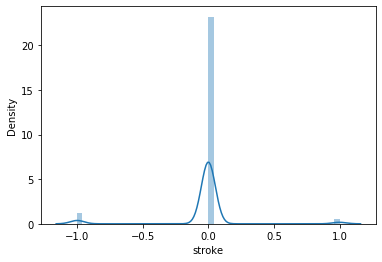

In [76]:
sns.distplot(y_test-y_pred)

In [77]:
pd.DataFrame(m2.feature_importances_,index=X.columns).sort_values(ascending=False,by=0)

0
age                0.461253
avg_glucose_level  0.269398
bmi                0.218013
gender             0.031157
hypertension       0.010581
heart_disease      0.009597

Accuracy Score:  92.78
[[1399  156]
 [  70 1507]]


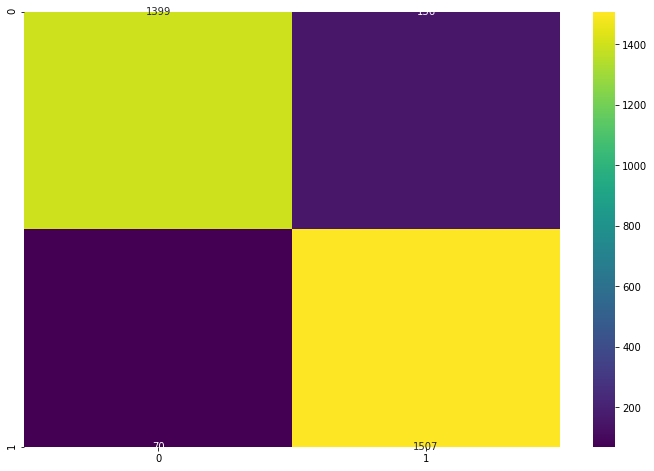

In [78]:
plt.figure(figsize=(12,8))
accuracy=accuracy_score(y_test, y_pred)*100
print("Accuracy Score: ","{0:.2f}".format(accuracy))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)),annot=True,fmt="g", cmap='viridis')
print(metrics.confusion_matrix(y_test, y_pred))
plt.show()

In [79]:
print("Random Forest Classifier report \n", classification_report(y_test, y_pred))

Random Forest Classifier report 
               precision    recall  f1-score   support

           0       0.95      0.90      0.93      1555
           1       0.91      0.96      0.93      1577

    accuracy                           0.93      3132
   macro avg       0.93      0.93      0.93      3132
weighted avg       0.93      0.93      0.93      3132



Applying xg-boost classifier 

[0]	validation_0-error:0.16486	validation_1-error:0.16475
[1]	validation_0-error:0.14954	validation_1-error:0.15421
[2]	validation_0-error:0.14283	validation_1-error:0.14847
[3]	validation_0-error:0.13118	validation_1-error:0.14048
[4]	validation_0-error:0.13757	validation_1-error:0.14208
[5]	validation_0-error:0.12911	validation_1-error:0.13761
[6]	validation_0-error:0.12687	validation_1-error:0.13601
[7]	validation_0-error:0.12352	validation_1-error:0.13154
[8]	validation_0-error:0.11570	validation_1-error:0.12803
[9]	validation_0-error:0.10916	validation_1-error:0.12516
[10]	validation_0-error:0.10788	validation_1-error:0.12484
[11]	validation_0-error:0.10389	validation_1-error:0.12293
[12]	validation_0-error:0.10102	validation_1-error:0.11941
[13]	validation_0-error:0.09927	validation_1-error:0.11622
[14]	validation_0-error:0.09288	validation_1-error:0.11175
[15]	validation_0-error:0.08809	validation_1-error:0.11175
[16]	validation_0-error:0.08793	validation_1-error:0.10952
[17]	va

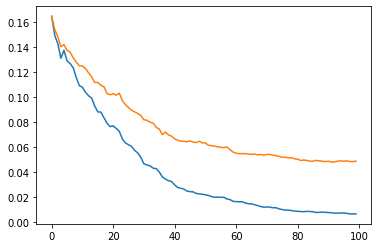

In [85]:
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, seed=123)
eval_set = [(X_train, y_train), (X_test, y_test)]

# Fit the classifier to the training set
xg_cl.fit(X_train, y_train, eval_metric=["error"], eval_set=eval_set, verbose=True)
results = xg_cl.evals_result()

# Predict the labels of the test set: preds
predictions = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(predictions == y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy*100))

fpr,tpr,_=roc_curve(y_test,y_pred)
roc_auc.append(auc(fpr,tpr))
print('AUC scores : %.02f (+/- %.05f) [%s]'% (np.mean(roc_auc),
                                                 np.var(roc_auc,ddof=1),xg_cl))


# plot classification error
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
plt.show()

In [86]:
pickle.dump(xg_cl,open('xgboost.pkl','wb'))